In [1]:
# TOP 8 FREQUENT SCAFFOLDS IN ChEMBL DATASET

#Importing Libraries

import os
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds import MurckoScaffold
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Reading ChEMBL dataset into a pandas dataframe
df = pd.read_csv("/home/dell11/scaffolds/14kchembl.csv", sep=';')
print(f"Shape of dataframe: {df.shape}\n")

Shape of dataframe: (14293, 32)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14293 entries, 0 to 14292
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParentMolecule        14293 non-null  object 
 1   Synonyms              14029 non-null  object 
 2   Research Codes        8501 non-null   object 
 3   Phase                 14293 non-null  int64  
 4   Applicants            2040 non-null   object 
 5   USAN Stem             7301 non-null   object 
 6   USAN Year             5742 non-null   float64
 7   USAN Stem Definition  7301 non-null   object 
 8   USAN Stem Substem     7301 non-null   object 
 9   First Approval        2172 non-null   float64
 10  ATC Codes             3157 non-null   object 
 11  Level 4 ATC Codes     3157 non-null   object 
 12  Level 3 ATC Codes     3157 non-null   object 
 13  Level 2 ATC Codes     3157 non-null   object 
 14  Level 1 ATC Codes     3157 non-null   object 
 15  Indication Class   

In [4]:
df.head(3)

,ParentMolecule,Synonyms,Research Codes,Phase,Applicants,USAN Stem,USAN Year,USAN Stem Definition,USAN Stem Substem,First Approval,...,Oral,Parenteral,Topical,Black Box,Availability Type,Withdrawn Year,Withdrawn Reason,Withdrawn Country,Withdrawn Class,Smiles
0,CHEMBL561339,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,Unknown,None,None,None,None,CCN(CC)C(=O)c1ccc(C2=CC3(CCNCC3)Oc3ccccc32)c(O)c1
1,CHEMBL242338,NaN,NaN,0,NaN,'-trop-; io-',NaN,atropine derivatives; iodine-containing contra...,'-trop-(-trop-); io-(io-)',NaN,...,False,False,False,False,Unknown,None,None,None,None,COC(=O)[C@H]1[C@@H](c2ccc(I)cc2)C[C@H]2CC[C@@H...
2,CHEMBL2103748,CILOFUNGIN|L-646991|LY-121019|LY121019,L-646991|LY-121019|LY121019,0,NaN,'-fungin',1989.0,antifungal antibiotics (undefined group),'-fungin(-fungin)',NaN,...,False,False,False,False,Unknown,None,None,None,None,CCCCCCCCOc1ccc(C(=O)N[C@H]2C[C@@H](O)[C@@H](O)...


In [5]:
df = df[["ParentMolecule", "Smiles"]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14293 entries, 0 to 14292
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ParentMolecule  14293 non-null  object
 1   Smiles          10560 non-null  object
dtypes: object(2)
memory usage: 223.5+ KB


In [7]:
df.head(3)

,ParentMolecule,Smiles
0,CHEMBL561339,CCN(CC)C(=O)c1ccc(C2=CC3(CCNCC3)Oc3ccccc32)c(O)c1
1,CHEMBL242338,COC(=O)[C@H]1[C@@H](c2ccc(I)cc2)C[C@H]2CC[C@@H...
2,CHEMBL2103748,CCCCCCCCOc1ccc(C(=O)N[C@H]2C[C@@H](O)[C@@H](O)...


In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10560 entries, 0 to 14292
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ParentMolecule  10560 non-null  object
 1   Smiles          10560 non-null  object
dtypes: object(2)
memory usage: 247.5+ KB


[22:56:18] WARNING: not removing hydrogen atom without neighbors
[22:56:18] WARNING: not removing hydrogen atom without neighbors
[22:56:18] WARNING: not removing hydrogen atom without neighbors


,ParentMolecule,Smiles,ROMol
0,CHEMBL561339,CCN(CC)C(=O)c1ccc(C2=CC3(CCNCC3)Oc3ccccc32)c(O)c1,
1,CHEMBL242338,COC(=O)[C@H]1[C@@H](c2ccc(I)cc2)C[C@H]2CC[C@@H...,
2,CHEMBL2103748,CCCCCCCCOc1ccc(C(=O)N[C@H]2C[C@@H](O)[C@@H](O)...,

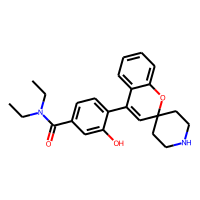
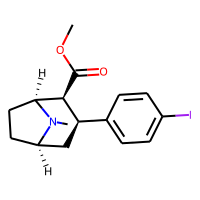
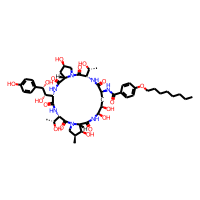

In [10]:
PandasTools.AddMoleculeColumnToFrame(df, 'Smiles')
df.head(3)

In [11]:
df = df[~df['ROMol'].isnull()]

In [12]:
PandasTools.AddMurckoToFrame(df)

,ParentMolecule,Smiles,ROMol,Murcko_SMILES
0,CHEMBL561339,CCN(CC)C(=O)c1ccc(C2=CC3(CCNCC3)Oc3ccccc32)c(O)c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",C1=C(c2ccccc2)c2ccccc2OC12CCNCC2
1,CHEMBL242338,COC(=O)[C@H]1[C@@H](c2ccc(I)cc2)C[C@H]2CC[C@@H...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",c1ccc([C@@H]2C[C@@H]3CC[C@H](C2)N3)cc1
2,CHEMBL2103748,CCCCCCCCOc1ccc(C(=O)N[C@H]2C[C@@H](O)[C@@H](O)...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",O=C(N[C@H]1CCCNC(=O)[C@@H]2CCCN2C(=O)CNC(=O)[C...

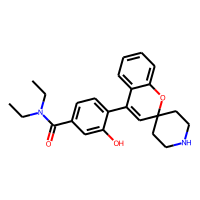
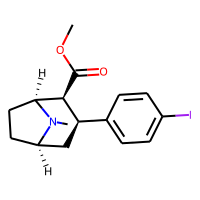
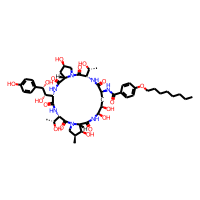

In [13]:
df.head(3)

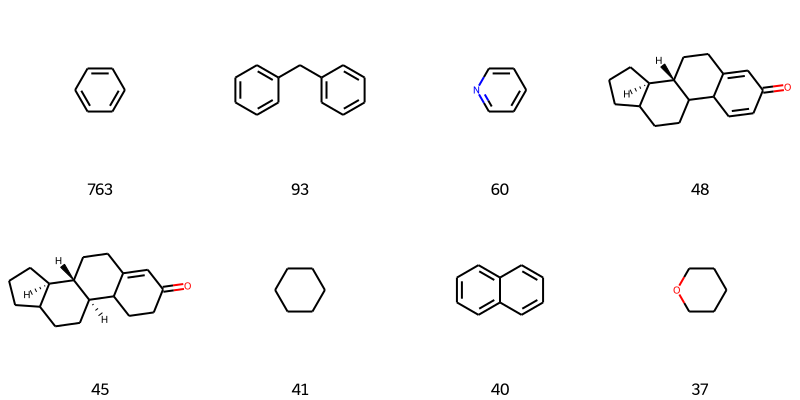

In [14]:
# Finding Murcko Scaffolds

PandasTools.AddMoleculeColumnToFrame(df, 'Smiles')
df = df[~df['ROMol'].isnull()]
PandasTools.AddMurckoToFrame(df)
st_Scaffolds = df.groupby(['Murcko_SMILES']).count().sort_values('Smiles', ascending=False)
st_Scaffolds = st_Scaffolds[['Smiles']] 
st_Scaffolds = st_Scaffolds.rename(columns={'Smiles':'count'})
st_Scaffolds['Murcko_SMILES'] = st_Scaffolds.index 
PandasTools.AddMoleculeColumnToFrame(st_Scaffolds, smilesCol='Murcko_SMILES')
PandasTools.FrameToGridImage(st_Scaffolds.dropna().head(8), legendsCol='count', molsPerRow=4)